In [1]:
import pandas as pd
import numpy as np
import xlrd
from plotly.graph_objs import Scatter, layout
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import cufflinks as cf
from urllib.request import urlopen
import json
import re
cf.go_offline()###这两句是离线生成图片的设置
cf.set_config_file(offline=True, world_readable=True)
plotly.offline.init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv('data.csv')

In [4]:
df.index = df['Unnamed: 0']
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df.head()

,Value,USD (PM),stopTrade,bitcoinMargin,goldMargin,bitcoinFive,goldTwenty
Unnamed: 0,,,,,,,
2016-09-11,621.65,NaN,1,NaN,NaN,NaN,NaN
2016-09-12,609.67,1324.60,0,-0.019271,NaN,NaN,NaN
2016-09-13,610.92,1323.65,0,0.002050,-0.000717,NaN,NaN
2016-09-14,608.82,1321.75,0,-0.003437,-0.001435,NaN,NaN
2016-09-15,610.38,1310.80,0,0.002562,-0.008284,612.288,NaN


In [8]:
# n-days bias
df['bitcoinBias'] = (df['Value'] - df['bitcoinFive']) / df['bitcoinFive']
df['goldBias'] = (df['USD (PM)'] - df['goldTwenty']) / df['goldTwenty']

In [15]:
df.head()

,Value,USD (PM),stopTrade,bitcoinMargin,goldMargin,bitcoinFive,goldTwenty,bitcoinBias,goldBias
date,,,,,,,,,
2016-09-11,621.65,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-12,609.67,1324.60,0,-0.019271,NaN,NaN,NaN,NaN,NaN
2016-09-13,610.92,1323.65,0,0.002050,-0.000717,NaN,NaN,NaN,NaN
2016-09-14,608.82,1321.75,0,-0.003437,-0.001435,NaN,NaN,NaN,NaN
2016-09-15,610.38,1310.80,0,0.002562,-0.008284,612.288,NaN,-0.003116,NaN


In [26]:
bit = pd.read_csv('prediction_of_bitcoin.csv')
god = pd.read_csv('prediction_of_gold.csv')

In [19]:
df.shape

(1826, 9)

In [20]:
bit.shape

(1806, 2)

In [21]:
god.shape

(1785, 2)

In [31]:
data_bit = np.append(np.array([0] * 41), god['data'].values)

In [32]:
df['predGold'] = data_bit

In [51]:
df.head()

,Value,USD (PM),stopTrade,bitcoinMargin,goldMargin,bitcoinFive,goldTwenty,bitcoinBias,goldBias,predBitcoin,predGold
date,,,,,,,,,,,
2016-09-11,621.65,0.00,1,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.0,0.0
2016-09-12,609.67,1324.60,0,-0.019271,0.000000,0.000,0.0,0.000000,0.0,0.0,0.0
2016-09-13,610.92,1323.65,0,0.002050,-0.000717,0.000,0.0,0.000000,0.0,0.0,0.0
2016-09-14,608.82,1321.75,0,-0.003437,-0.001435,0.000,0.0,0.000000,0.0,0.0,0.0
2016-09-15,610.38,1310.80,0,0.002562,-0.008284,612.288,0.0,-0.003116,0.0,0.0,0.0


In [49]:
df = df.fillna(0)

In [53]:
mx, mn = df['goldMargin'].max(), df['goldMargin'].min()
df['gM_norm'] = df['goldMargin'].apply(lambda x : (x - mn) / (mx - mn))

In [54]:
df['bB_norm'] = np.abs(df['bitcoinBias'])
df['gB_norm'] = np.abs(df['goldBias'])

In [56]:
mx, mn = df['gB_norm'].max(), df['gB_norm'].min()
df['gB_norm'] = df['gB_norm'].apply(lambda x : (x - mn) / (mx - mn))

In [57]:
df.head()

,Value,USD (PM),stopTrade,bitcoinMargin,goldMargin,bitcoinFive,goldTwenty,bitcoinBias,goldBias,predBitcoin,predGold,bM_norm,gM_norm,bB_norm,gB_norm
date,,,,,,,,,,,,,,,
2016-09-11,621.65,0.00,1,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.0,0.0,0.641569,0.493311,0.00000,0.0
2016-09-12,609.67,1324.60,0,-0.019271,0.000000,0.000,0.0,0.000000,0.0,0.0,0.0,0.609981,0.493311,0.00000,0.0
2016-09-13,610.92,1323.65,0,0.002050,-0.000717,0.000,0.0,0.000000,0.0,0.0,0.0,0.644930,0.486412,0.00000,0.0
2016-09-14,608.82,1321.75,0,-0.003437,-0.001435,0.000,0.0,0.000000,0.0,0.0,0.0,0.635935,0.479503,0.00000,0.0
2016-09-15,610.38,1310.80,0,0.002562,-0.008284,612.288,0.0,-0.003116,0.0,0.0,0.0,0.645769,0.413621,0.00915,0.0


In [61]:
# 牛市
df['bitcoin_cow'] = df['bM_norm'].rolling(30).mean() * 0.7 + df['bB_norm'].rolling(30).mean() * 0.3
df['gold_cow'] = df['gM_norm'].rolling(90).mean() * 0.7 + df['gB_norm'].rolling(90).mean() * 0.3

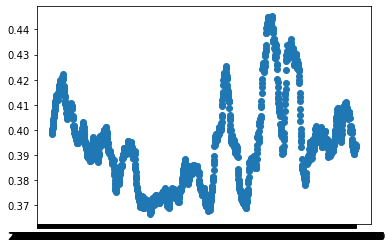

In [82]:
import matplotlib.pyplot as plt
plt.scatter(df.index, df['gold_cow'])
plt.show()

In [89]:
g_cow = []
g_bear = []
for i in range(89,df.shape[0]):
    if df['gold_cow'][i]>0.40:
        g_cow.append(i)
    if df['gold_cow'][i]<=0.40:
        g_bear.append(i)

In [105]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x = df.index,
    y = df['Value'],
    mode='lines',
))
fig.add_trace(go.Scatter(
    x = df.index[29:],
    y = df['Value'][29:],
    mode = 'markers',
    marker = dict(
        size=4,
        color=df['bitcoin_cow'][29:],
        colorscale='Inferno',
        showscale=True
    )
))
fig.update_layout(showlegend=False, title=dict(text='Bitcoin\'s stock market index', x=0.5, y=0.9),
    height=400,
    width=500,
    xaxis_title='Date',
    yaxis_title='U.S. dollars($)',
)
fig.show()

In [78]:
mn, mx = df['bitcoin_cow'].min(), df['bitcoin_cow'].max()
df['bitcoin_cow_norm'] = df['bitcoin_cow'].apply(lambda x : (x - mn) / (mx - mn))

In [130]:
mn, mx = df['gold_cow'].min(), df['gold_cow'].max()
df['gold_cow_norm'] = df['gold_cow'].apply(lambda x : (x - mn) / (mx - mn))

In [107]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x = df.index[89:],
    y = df['USD (PM)'][89:],
    mode='lines',
))
fig.add_trace(go.Scatter(
    x = df.index[89:],
    y = df['USD (PM)'][89:],
    mode = 'markers',
    marker = dict(
        size=4,
        color=df['gold_cow'][89:],
        colorscale='Viridis',
        showscale=True,
    )
))
fig.update_layout(showlegend=False, title=dict(text='Gold\'s stock market index', x=0.5, y=0.9),
    height=400,
    width=500,
    xaxis_title='Date',
    yaxis_title='U.S. dollars($)',
)
fig.show()

In [126]:
df['bitcoin_v'] = np.abs(df['bitcoin_v'])
df['gold_v'] = np.abs(df['gold_v'])

In [128]:
mx, mn = df['gold_v'].max(), df['gold_v'].min()
df['gold_v'] = df['gold_v'].apply(lambda x : (x - mn) / (mx - mn))

In [139]:
# 至此，风险系数三个因素都归一化了，bitcoin_v, gold_v, bitcoin_cow_norm, gold_cow_norm, bB_norm, gB_norm
df.head()

,Value,USD (PM),stopTrade,bitcoinMargin,goldMargin,bitcoinFive,goldTwenty,bitcoinBias,goldBias,bM_norm,gM_norm,bB_norm,gB_norm,bitcoin_cow,gold_cow,bitcoin_cow_norm,bitcoin_v,gold_v,gold_cow_norm
date,,,,,,,,,,,,,,,,,,,
2016-09-11,621.65,0.00,1,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.641569,0.493311,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
2016-09-12,609.67,1324.60,0,-0.019271,0.000000,0.000,0.0,0.000000,0.0,0.609981,0.493311,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
2016-09-13,610.92,1323.65,0,0.002050,-0.000717,0.000,0.0,0.000000,0.0,0.644930,0.486412,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
2016-09-14,608.82,1321.75,0,-0.003437,-0.001435,0.000,0.0,0.000000,0.0,0.635935,0.479503,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
2016-09-15,610.38,1310.80,0,0.002562,-0.008284,612.288,0.0,-0.003116,0.0,0.645769,0.413621,0.00915,0.0,0.0,0.0,0.0,0.00094,0.0,0.0


In [166]:
# 对于风险来说， 速度， 市场指数， 乖离率都是越大风险越大，因此都是正向指标
b_risk = pd.DataFrame({'v':df['bitcoin_v'], 'cow':df['bitcoin_cow_norm'], 'bias':df['bB_norm']})
g_risk = pd.DataFrame({'v':df['gold_v'], 'cow':df['gold_cow_norm'], 'bias':df['gB_norm']})

In [168]:
def f(x):
    return np.sqrt(np.sum(np.square(x)))
x, y, z = f(b_risk['v']), f(b_risk['cow']), f(b_risk['bias'])
b_risk['v'] = b_risk['v'] / x
b_risk['cow'] = b_risk['cow'] / y
b_risk['bias'] = b_risk['bias'] / z


In [170]:
for col in b_risk.columns:
    mn, mx = b_risk[col].min(), b_risk[col].max()
    b_risk[col] = b_risk[col].apply(lambda x : (x - mn) / (mx - mn))

In [171]:
# ~Z
for col in b_risk.columns:
    tmp = np.sum(b_risk[col])
    b_risk[col] = b_risk[col] / tmp

In [174]:
n = b_risk.shape[0]

In [177]:
e = []
for col in b_risk.columns:
    e.append(np.sum(np.multiply(b_risk[col], np.log(b_risk[col]))))

C:\Users\霖\venv\scrapy\lib\site-packages\pandas\core\series.py:679: RuntimeWarning:

divide by zero encountered in log



In [180]:
d = 1 - np.array(e)

In [182]:
W = d / np.sum(d)

In [183]:
W

array([0.31689368, 0.34626313, 0.33684319])

In [184]:
# gold
def f(x):
    return np.sqrt(np.sum(np.square(x)))
x, y, z = f(g_risk['v']), f(g_risk['cow']), f(g_risk['bias'])
g_risk['v'] = g_risk['v'] / x
g_risk['cow'] = g_risk['cow'] / y
g_risk['bias'] = g_risk['bias'] / z


In [185]:
for col in g_risk.columns:
    mn, mx = g_risk[col].min(), g_risk[col].max()
    g_risk[col] = g_risk[col].apply(lambda x : (x - mn) / (mx - mn))
# ~Z
for col in g_risk.columns:
    tmp = np.sum(g_risk[col])
    g_risk[col] = g_risk[col] / tmp
n = g_risk.shape[0]
e = []
for col in g_risk.columns:
    e.append(np.sum(np.multiply(g_risk[col], np.log(g_risk[col]))))
d = 1 - np.array(e)
W = d / np.sum(d)

C:\Users\霖\venv\scrapy\lib\site-packages\pandas\core\series.py:679: RuntimeWarning:

divide by zero encountered in log



In [186]:
W

array([0.32732319, 0.34240056, 0.33027624])

In [187]:
W1 = np.array([0.31689368, 0.34626313, 0.33684319])
W2 = np.array([0.32732319, 0.34240056, 0.33027624])
df['risk_b'] = W1[0] * df['bitcoin_v'] + W[1] * df['bitcoin_cow_norm'] + W[2] * df['bB_norm']
df['risk_g'] = W2[0] * df['gold_v'] + W[1] * df['gold_cow_norm'] + W[2] * df['gB_norm']

In [188]:
for col in ['risk_b', 'risk_g']:
    mn, mx = df[col].min(), df[col].max()
    df[col] = df[col].apply(lambda x : (x - mn) / (mx - mn))

In [192]:
y1, y2 = np.mean(df['risk_b']), np.mean(df['risk_g'])

In [212]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['risk_b'],
    mode='lines',
    name='Risk Factor of Gold'
))
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['risk_g'],
    mode='lines',
    name='Risk Factor of Bitcoin'
))
fig.add_trace(go.Scatter(
    x=df.index,
    y=[y1] * len(df.index),
    mode='lines',
    name='Average of the risk factors for Gold',
    line=dict(color='navy', width=4, dash='dash')
))
fig.add_trace(go.Scatter(
    x=df.index,
    y=[y2] * len(df.index),
    mode='lines',
    name='Average of the risk factors for Bitcoin',
    line=dict(color='mediumvioletred', width=4, dash='dash')
))
fig.update_layout(title={'text':'Risk factors of Bitcoin and Gold', 'x':0.5, 'y':0.85},
    width=800,
    xaxis_title='Date',
)
fig.show()

In [233]:
fig=go.Figure()
fig.add_trace(go.Scatter(
    x=df.index[29:],
    y=df['bitcoin_cow'][29:],
    mode='lines',
    name='MI of bitcoin',
    marker=dict(color='rgb(231, 41, 138)')
))
fig.add_trace(go.Scatter(
    x=df.index[89:],
    y=df['gold_cow'][89:],
    mode='lines',
    name='MI of gold',
    marker=dict(color='rgb(68, 170, 153)')
))
fig.update_layout(title={'text':'MI of bitcoin and Gold', 'x':0.5, 'y':0.85},xaxis_title='Date',width=800)
fig.show()

In [252]:
df_ = pd.read_excel('all.xlsx')

In [253]:
df_.isna().sum()

Unnamed: 0     0
Date           0
USD (PM)       0
Value          0
DealDay        0
黄金涨幅           0
比特币涨幅          0
黄金15日均价        0
黄金15日乖离率       0
比特币5日均价        0
比特币5日乖离率       0
当前黄金投资占比       0
当前比特币投资占比      0
黄金投资风险         0
比特币投资风险        0
黄金持有份额         0
比特币持有份额        0
现金持有份额         0
总资产            0
总资产变化率         0
当前黄金利润         0
当前比特币利润        0
牛市             0
黄金15日后预计份额     0
预计黄金涨幅        22
比特币5日后预计份额     0
预计比特币涨幅        0
预计现金持有份额       0
预计总资产          0
预计总资产变化率       0
黄金牛市           0
gold_cow       0
比特币牛市          0
bt_cow         0
黄金购买风险         0
比特币购买风险        0
黄金残差          22
比特币残差          0
预计黄金涨幅归一化     22
预计比特币涨幅归一化     0
黄金买入评分        22
比特币买入评分        0
dtype: int64

In [263]:
df['incBitcoin'] = np.array(df_['预计黄金涨幅归一化'])
df['incGold'] = np.array(df_['预计比特币涨幅归一化'])

In [265]:
df['PIb'] = 0.7*df['incBitcoin'] + 0.3 * df['risk_b']
df['PIg'] = 0.8 * df['incGold'] + 0.2 * df['risk_g']

In [266]:
for col in ['PIb', 'PIg']:
    mx, mn = df[col].max(), df[col].min()
    df[col] = df[col].apply(lambda x : (x - mn) / (mx - mn))

In [270]:
fig=go.Figure()
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['PIb'],
    mode='lines',
    name='PI of gold',
    marker=dict(color='rgb(158, 185, 243)')
))
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['PIg'],
    mode='lines',
    name='PI of bitcoin',
    marker=dict(color='rgb(254, 136, 177)')
))
fig.update_layout(title={'text':'PI of bitcoin and Gold', 'x':0.5, 'y':0.85},xaxis_title='Date',width=800)
fig.show()

In [ ]:
df.to_csv('total_features.csv')